In [72]:
import numpy as np
import seaborn as sns
import pingouin as pg
from matplotlib import pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [13]:

df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/MEGALEX.csv')


In [14]:
df.head()

,item,n_trials,err,rt,sd,rtz,n_used,c_freq_movies,lc_freq_movies,c_freq_books,lc_freq_books,n_letters,n_syllables
0,abaissa,25,0.04,721.833333,106.416191,-0.035017,24,0.00,#NAME?,2.64,0.421603927,7,3
1,abaissait,25,0.08,836.782609,257.778086,0.366517,23,0.02,-1.698970004,2.50,0.397940009,9,3
2,abaissant,26,0.00,773.840000,224.378713,0.254392,25,0.04,-1.397940009,2.77,0.442479769,9,3
3,abaisse,25,0.04,698.826087,246.667913,-0.216788,23,1.30,0.113943352,3.45,0.537819095,7,2
4,abaissé,25,0.00,656.782609,177.024897,-0.434544,23,0.77,-0.113509275,1.55,0.190331698,7,3


In [15]:
# remove missing data
data = df.loc[(df['lc_freq_books'] != '#NAME?')]
data['lc_freq_books'] = pd.to_numeric(data['lc_freq_books'], downcast='float')

<AxesSubplot:xlabel='n_letters', ylabel='rt'>

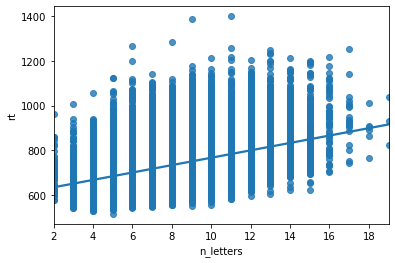

In [16]:
sns.regplot(data = data, x = 'n_letters', y = 'rt')

In [17]:

data = df.loc[(df['lc_freq_books'] != '#NAME?')]
data.loc[:,'lc_freq_books'] = pd.to_numeric(data.loc[:,'lc_freq_books'], downcast='float')
data.head()

,item,n_trials,err,rt,sd,rtz,n_used,c_freq_movies,lc_freq_movies,c_freq_books,lc_freq_books,n_letters,n_syllables
0,abaissa,25,0.04,721.833333,106.416191,-0.035017,24,0.00,#NAME?,2.64,0.421604,7,3
1,abaissait,25,0.08,836.782609,257.778086,0.366517,23,0.02,-1.698970004,2.50,0.397940,9,3
2,abaissant,26,0.00,773.840000,224.378713,0.254392,25,0.04,-1.397940009,2.77,0.442480,9,3
3,abaisse,25,0.04,698.826087,246.667913,-0.216788,23,1.30,0.113943352,3.45,0.537819,7,2
4,abaissé,25,0.00,656.782609,177.024897,-0.434544,23,0.77,-0.113509275,1.55,0.190332,7,3


<AxesSubplot:xlabel='c_freq_movies', ylabel='c_freq_books'>

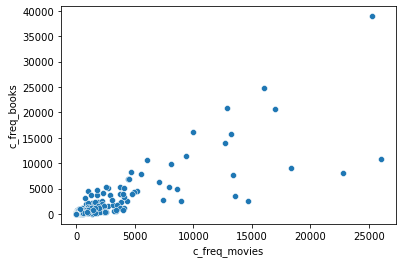

In [19]:
sns.scatterplot(data = data, x = 'c_freq_movies', y = 'c_freq_books')

# challenge: add labels to the outlier points

In [37]:
data = data.sort_values(by=['c_freq_books'], ascending=False)
data.head()

,item,n_trials,err,rt,sd,rtz,n_used,c_freq_movies,lc_freq_movies,c_freq_books,lc_freq_books,n_letters,n_syllables
9271,de,25,0.080000,615.409091,81.500020,-0.467695,22,25220.96,4.401761613,38928.92,4.590272,2,1
21052,la,25,0.000000,727.760000,233.664517,-0.097423,25,16028.08,4.204881501,24877.30,4.395803,2,1
14633,et,24,0.166667,649.250000,145.831509,-0.521128,20,12909.08,4.110895292,20879.73,4.319725,2,1
21325,le,25,0.040000,597.791667,105.954863,-0.591781,24,16953.50,4.229259371,20735.14,4.316707,2,1
21405,les,26,0.000000,661.269231,161.770840,-0.257769,26,9961.13,3.998308608,16074.53,4.206138,3,1


In [54]:
words = list(data['item'])
freq = list(data['c_freq_books'])

list(zip(words, freq))[0:20]

[('de', 38928.92),
 ('la', 24877.3),
 ('et', 20879.73),
 ('le', 20735.14),
 ('les', 16074.53),
 ('il', 15832.16),
 ('un', 13946.36),
 ('en', 11402.97),
 ('je', 10862.77),
 ('des', 10624.93),
 ('une', 9830.81),
 ('pas', 9129.33),
 ('dans', 8296.08),
 ('est', 7984.12),
 ('qui', 7923.25),
 ('ne', 7752.09),
 ('elle', 6991.49),
 ('du', 6882.16),
 ('pour', 6214.19),
 ('ce', 5395.13)]

<AxesSubplot:>

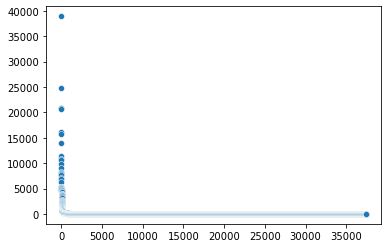

In [55]:
sns.scatterplot(x = [i for i in range(len(freq))], y = freq)

<AxesSubplot:>

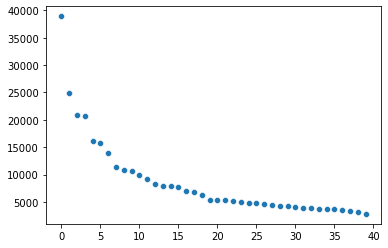

In [57]:
# Zipf's law

HF = freq[0:40]
sns.scatterplot(x = [i for i in range(len(HF))], y = HF)

<AxesSubplot:xlabel='lc_freq_books', ylabel='rt'>

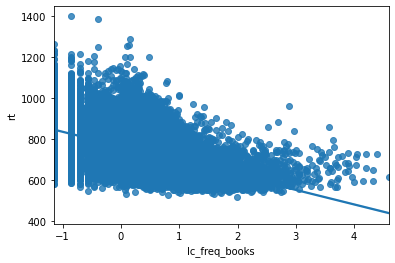

In [27]:
sns.regplot(data = data, x = 'lc_freq_books', y = 'rt')

In [61]:
data = df.loc[(df['c_freq_books'] != '#NAME?')]
data = data.loc[(data['c_freq_movies'] != '#NAME?')]

data.loc[:,'c_freq_books'] = pd.to_numeric(data.loc[:,'c_freq_books'], downcast='float')
data.loc[:,'c_freq_movies'] = pd.to_numeric(data.loc[:,'c_freq_movies'], downcast='float')
data.head()

,item,n_trials,err,rt,sd,rtz,n_used,c_freq_movies,lc_freq_movies,c_freq_books,lc_freq_books,n_letters,n_syllables
0,abaissa,25,0.04,721.833333,106.416191,-0.035017,24,0.00,#NAME?,2.64,0.421603927,7,3
1,abaissait,25,0.08,836.782609,257.778086,0.366517,23,0.02,-1.698970004,2.50,0.397940009,9,3
2,abaissant,26,0.00,773.840000,224.378713,0.254392,25,0.04,-1.397940009,2.77,0.442479769,9,3
3,abaisse,25,0.04,698.826087,246.667913,-0.216788,23,1.30,0.113943352,3.45,0.537819095,7,2
4,abaissé,25,0.00,656.782609,177.024897,-0.434544,23,0.77,-0.113509275,1.55,0.190331698,7,3


<AxesSubplot:xlabel='n_syllables', ylabel='rt'>

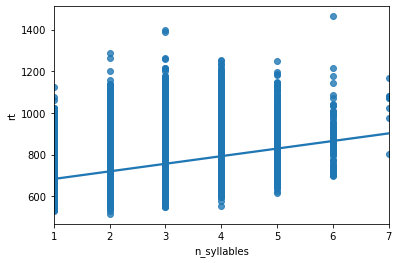

In [68]:
sns.regplot(data = data, x = 'n_syllables', y = 'rt')
# text box with correlation coefficient

In [67]:
pg.linear_regression(data['n_syllables'], data['rt'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,647.245505,1.445660,447.716182,0.0,0.107434,0.107411,644.411973,650.079037
1,n_syllables,36.446271,0.536556,67.926294,0.0,0.107434,0.107411,35.394607,37.497935


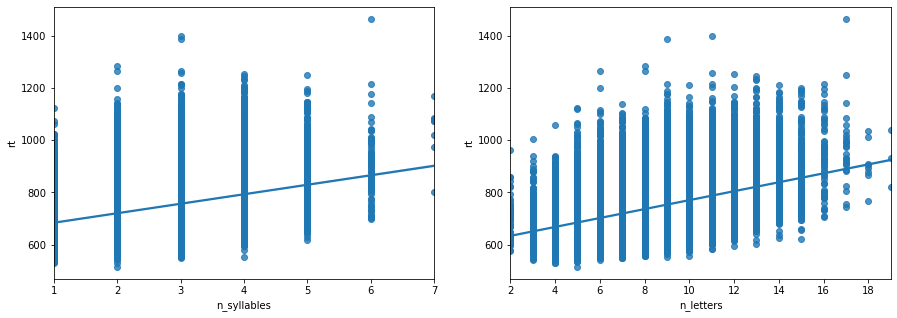

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax0 = sns.regplot(data = data, x = 'n_syllables', y = 'rt', ax=axes[0])
ax1 = sns.regplot(data = data, x = 'n_letters', y = 'rt', ax=axes[1])

In [70]:
pg.linear_regression(data[['n_syllables', 'n_letters']], data['rt'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,597.156619,1.723831,346.412446,0.000000e+00,0.16181,0.161766,593.777865,600.535373
1,n_syllables,8.275544,0.767786,10.778448,4.758422e-27,0.16181,0.161766,6.770663,9.780425
2,n_letters,14.804351,0.296878,49.866746,0.000000e+00,0.16181,0.161766,14.222462,15.386240
